# **Estudo sobre obtenção de dados do Twitter**

  Esse notebook tem por objetivo promover o estudo pratico da utilização da api do twitter para obtenção de tweets de um usuário. De modo detalhado, iniciaremos o presente notebook entendendo a forma pela qual as requisições de dados no twitter são feitas, em seguida iremos entender o formato desse dado. Após essa primeira parte, partiremos para o aprendizado de como estruturar os dados bruto em diretórios e como processar essas dados. Por fim, iremos realizar um conjunto de abordagens que visam facilitar a extração de caracteristicas dos dados. 


### 1.Instalando bibliotecas 

  A linguagem a ser utilizada nesse script é o python, e o conjunto de bibliotecas necessárias para o desenvolvimento desse notebook encontram-se no arquivo requirements.txt e, para instala-los, vamos usar o instalador de pacotes do python, o pip.Para saber mais sobre o pip, ver [pip documentation](https://pip.pypa.io/en/stable/reference/pip_install/).


In [1]:
!pip install -r requirements2.txt

     |████████████████████████████████| 1.4MB 4.5MB/s 
     |████████████████████████████████| 22.0MB 1.4MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 133kB 47.1MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 2.9MB 45.8MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 1.2MB 39.9MB/s 
     |████████████████████████████████| 204kB 46.2MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 972kB 45.4MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 266kB 48.8MB/s 
     |████████████████████████████████| 153kB 48.5MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 102kB 11.3MB/s 
  Create

### 2.Autenticação no twitter

  Agora que já temos todas a bibliotecas necessárias instaladas, vamos iniciar o processo de autenticação de usuário. A autenticação é necessária para que vc tenha acesso as ferramentos do twitter desenvolvidas para desenvolvedores de aplicações. Para criar uma conta developer no twitter, antes você precisa ter uma conta no [twitter](http://twitter.com.br/). Você irá encontrar informações de como ter acesso a conta developer [aqui](https://developer.twitter.com/en/apply-for-access). Depois de obtido a conta developer, suas credenciais podem ser encontradas [aqui]( https://developer.twitter.com/en/portal/dashboard).
  


In [2]:
#@title Autenticando usuário 
api_key = "rRRLYoufBQukOmFeMRQyWVuG9" # API key
api_key_secret = "bPaLMINpo29tsctY4Ta7qTYBsj8iqjVnmUuijTxvAsuxK5xnZW" # API key secret
access_token = "1312228473839267841-763VxH5Op6hrbbEM321LNV0K61LnUY" # Access token
access_token_secret = "LwSyRCi195fK1JCHW5JUorK5ru4P2OMq3HileLgra1aZH" # Access token secret

In [3]:
import tweepy
# as variaveis api_key, api_key_secret, access_token, access_token_secret devem 
# ser inicializadas com os valores obtidos na conta developer.

# autentincando acesso na API
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
if api.verify_credentials():
    print("Credenciais verificadas.")

Credenciais verificadas.


### 3.Explorando os dados 

Antes de começar a recolher tweets dos usuários, devemos entender o formato ao qual esse dado está estruturado, então, vamos realizar a busca de um tweet especifico para isso. Vamos usar como exemplo um tweet do jogador de futebol Cristiano Ronaldo, que encontra-se no seguinte link: https://twitter.com/Cristiano/status/1311236846131658753. 



In [4]:
# recolhendo tweet por id
tweet = api.get_status(id = '1311236846131658753')
tweet

Status(_api=<tweepy.api.API object at 0x7f8505352b70>, _json={'created_at': 'Wed Sep 30 09:30:00 +0000 2020', 'id': 1311236846131658753, 'id_str': '1311236846131658753', 'text': 'Determination. Drive. Nutrition ⚽️ Behind my performance is #HerbalifeNutrition\n@Herbalife24  #CR7Drive https://t.co/gg88XkYwk3', 'truncated': False, 'entities': {'hashtags': [{'text': 'HerbalifeNutrition', 'indices': [60, 79]}, {'text': 'CR7Drive', 'indices': [94, 103]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Herbalife24', 'name': 'Herbalife24', 'id': 282788614, 'id_str': '282788614', 'indices': [80, 92]}], 'urls': [], 'media': [{'id': 1310862196495323138, 'id_str': '1310862196495323138', 'indices': [104, 127], 'media_url': 'http://pbs.twimg.com/amplify_video_thumb/1310862196495323138/img/7h9HYMlXY5IK1tmo.jpg', 'media_url_https': 'https://pbs.twimg.com/amplify_video_thumb/1310862196495323138/img/7h9HYMlXY5IK1tmo.jpg', 'url': 'https://t.co/gg88XkYwk3', 'display_url': 'pic.twitter.com/gg88XkYwk3', 

Como podemos ver, o status retornando é composto de um objeto identificando o tipo dos dados e seu conteúdo, em formato .json. Podemos acessar apenas o conteúdo do tweet da seguinte forma:

In [5]:
# visualizando conteúdo de um tweet
tweet._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Sep 30 09:30:00 +0000 2020',
 'entities': {'hashtags': [{'indices': [60, 79], 'text': 'HerbalifeNutrition'},
   {'indices': [94, 103], 'text': 'CR7Drive'}],
  'media': [{'display_url': 'pic.twitter.com/gg88XkYwk3',
    'expanded_url': 'https://twitter.com/Cristiano/status/1311236846131658753/video/1',
    'id': 1310862196495323138,
    'id_str': '1310862196495323138',
    'indices': [104, 127],
    'media_url': 'http://pbs.twimg.com/amplify_video_thumb/1310862196495323138/img/7h9HYMlXY5IK1tmo.jpg',
    'media_url_https': 'https://pbs.twimg.com/amplify_video_thumb/1310862196495323138/img/7h9HYMlXY5IK1tmo.jpg',
    'sizes': {'large': {'h': 720, 'resize': 'fit', 'w': 720},
     'medium': {'h': 720, 'resize': 'fit', 'w': 720},
     'small': {'h': 680, 'resize': 'fit', 'w': 680},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/gg88XkYwk3'}],
  'symbols': [],
  'urls': [],
  

Como podemos ver, o arquivo .json é composto de <chave; valor>, valores os quais, podem conter valores 'terminais' ou outros conjuntos de <chave;valor>. É bastante importante entender o formato desse dados, pois será dele que iremos extrair informações de interesse. O acesso a informações de interesse é feito da seguinte forma: 

In [6]:
print("Nome:", tweet.user.name)
print("Username do usuário:", tweet.user.screen_name)
print("Conteúdo do tweet:", tweet.text)
print("Quantidade de likes do tweet:", tweet.favorite_count)
print("Quantidade de retweets do tweet:", tweet.retweet_count)

Nome: Cristiano Ronaldo
Username do usuário: Cristiano
Conteúdo do tweet: Determination. Drive. Nutrition ⚽️ Behind my performance is #HerbalifeNutrition
@Herbalife24  #CR7Drive https://t.co/gg88XkYwk3
Quantidade de likes do tweet: 69695
Quantidade de retweets do tweet: 4644


In [7]:
# extraindo tweets para lista de usuários
def extract_all_tweets_for_user(api, username):

    tem_mais_tweets = True
    print(f"Recolhendo tweets para {username} ...")
    todos_tweets = []
    latest_id = None

    while tem_mais_tweets:
        tweets = api.user_timeline(screen_name = username,
                                   count = 200, 
                                   include_rts=False,
                                   max_id=latest_id,
                                   tweet_mode='extended' 
                                  )
        todos_tweets.extend(tweets)
        if not tweets:
            tem_mais_tweets = False
        else:
            latest_id = tweets[-1].id - 1

    print(f"Foram recolhidos {len(todos_tweets)} tweets.")

    return todos_tweets

In [10]:
# lista de usuários
usuarios = [
    'realDonaldTrump',
    'JustinTrudeau',
    'alferdez',
    'LuisLacallePou',
    'lopezobrador_',
    'jairbolsonaro',
    'sebastianpinera',
    'MartinVizcarraC',
    'MaritoAbdo',
    'Lenin',
]

In [11]:
# extaindo tweets par usuarios
tweet_list = []
for username in usuarios:
    user_tts = extract_all_tweets_for_user(api, username)
    tweet_list.extend(user_tts)
    
print(f"Total de tweets coletados: {len(tweet_list)}.")

Recolhendo tweets para realDonaldTrump ...
Foram recolhidos 338 tweets.
Recolhendo tweets para JustinTrudeau ...
Foram recolhidos 1695 tweets.
Recolhendo tweets para alferdez ...
Foram recolhidos 1620 tweets.
Recolhendo tweets para LuisLacallePou ...
Foram recolhidos 1101 tweets.
Recolhendo tweets para lopezobrador_ ...
Foram recolhidos 3222 tweets.
Recolhendo tweets para jairbolsonaro ...
Foram recolhidos 3043 tweets.
Recolhendo tweets para sebastianpinera ...
Foram recolhidos 2937 tweets.
Recolhendo tweets para MartinVizcarraC ...
Foram recolhidos 1209 tweets.
Recolhendo tweets para MaritoAbdo ...
Foram recolhidos 2435 tweets.
Recolhendo tweets para Lenin ...
Foram recolhidos 3057 tweets.
Total de tweets coletados: 20657.


In [12]:
# salvando os dados em disco
import os
import json
from datetime import datetime
from tqdm.notebook import tqdm 

def criando_datalake(tweet_list):
    # organizando os dados por usuário, data e hora de request
    datalake_user_path = "datalake/tweets/presidentes/{username}/dt={date}/hr={hour}"

    # escrevendo arquivos no disco
    for tweet in tqdm(tweet_list):
        now = datetime.now()
        data = now.strftime("%Y-%m-%d")
        hora = now.strftime("%H")
        username = tweet.user.screen_name

        # nome do arquivo id.json
        tweet_id = tweet.id
        
        # definindo path
        path = datalake_user_path.format(
            username = username,
            date = data,
            hour = hora
        )
        
        # criando diretório 
        os.makedirs(path, exist_ok = True)

        # definindo nome do arquivo
        fname = f"{tweet_id}.json"
        # definindo diretório que o arquivo será salvo
        fpath = os.path.join(path, fname)

        # selecionando o tweet
        dados = json.dumps(tweet._json) 

        # salvando no respectivo diretorio
        with open(fpath, 'w') as fp:
            fp.write(dados)

criando_datalake(tweet_list)

In [18]:
import glob
import json
import unidecode
from collections import Counter

In [19]:
# lendo os dados salvos em disco
files = glob.glob('datalake/tweets/presidentes/*/*/*/*')
print(f"Quantidade de tweets: {len(files)}")
files[0:10]

Quantidade de tweets: 20657


['datalake/tweets/presidentes/jairbolsonaro/dt=2020-10-20/hr=14/1293301092126732290.json',
 'datalake/tweets/presidentes/jairbolsonaro/dt=2020-10-20/hr=14/1180554716381683712.json',
 'datalake/tweets/presidentes/jairbolsonaro/dt=2020-10-20/hr=14/1291835014880079872.json',
 'datalake/tweets/presidentes/jairbolsonaro/dt=2020-10-20/hr=14/1234137761764069376.json',
 'datalake/tweets/presidentes/jairbolsonaro/dt=2020-10-20/hr=14/1242173881475104768.json',
 'datalake/tweets/presidentes/jairbolsonaro/dt=2020-10-20/hr=14/1259642684580474880.json',
 'datalake/tweets/presidentes/jairbolsonaro/dt=2020-10-20/hr=14/1258022749651505152.json',
 'datalake/tweets/presidentes/jairbolsonaro/dt=2020-10-20/hr=14/1239311780075241479.json',
 'datalake/tweets/presidentes/jairbolsonaro/dt=2020-10-20/hr=14/1293249073382854662.json',
 'datalake/tweets/presidentes/jairbolsonaro/dt=2020-10-20/hr=14/1171095179517935616.json']

In [20]:
# explorando nossos dados
amostra = files[0]
with open(amostra, 'r') as f:
    dados = f.read()

print(f"Tipo: {type(dados)}")
print(f"Conteúdo:\n{dados[:100]}...")

Tipo: <class 'str'>
Conteúdo:
{"created_at": "Tue Aug 11 21:39:43 +0000 2020", "id": 1293301092126732290, "id_str": "1293301092126...


In [22]:
# transformando dados json > dict
data = json.loads(dados)
print(f"Tipo: {type(data)}")

# iterando sobre todos campos do dicionário
for key, value in data.items():
    print("key:", key)
    print("\tvalue:", value)
    print()

Tipo: <class 'dict'>
key: created_at
	value: Tue Aug 11 21:39:43 +0000 2020

key: id
	value: 1293301092126732290

key: id_str
	value: 1293301092126732290

key: full_text
	value: @filgmartin 🤝🇧🇷

key: truncated
	value: False

key: display_text_range
	value: [12, 15]

key: entities
	value: {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'filgmartin', 'name': 'Filipe G. Martins', 'id': 896736181198741505, 'id_str': '896736181198741505', 'indices': [0, 11]}], 'urls': []}

key: source
	value: <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

key: in_reply_to_status_id
	value: 1293288460166586370

key: in_reply_to_status_id_str
	value: 1293288460166586370

key: in_reply_to_user_id
	value: 896736181198741505

key: in_reply_to_user_id_str
	value: 896736181198741505

key: in_reply_to_screen_name
	value: filgmartin

key: user
	value: {'id': 128372940, 'id_str': '128372940', 'name': 'Jair M. Bolsonaro', 'screen_name': 'jairbolsonaro', 'location'

In [23]:
# listando todos campos disponíveis
for key in data.keys():
    print(key)

created_at
id
id_str
full_text
truncated
display_text_range
entities
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
lang


In [24]:
print(data)

{'created_at': 'Tue Aug 11 21:39:43 +0000 2020', 'id': 1293301092126732290, 'id_str': '1293301092126732290', 'full_text': '@filgmartin 🤝🇧🇷', 'truncated': False, 'display_text_range': [12, 15], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'filgmartin', 'name': 'Filipe G. Martins', 'id': 896736181198741505, 'id_str': '896736181198741505', 'indices': [0, 11]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1293288460166586370, 'in_reply_to_status_id_str': '1293288460166586370', 'in_reply_to_user_id': 896736181198741505, 'in_reply_to_user_id_str': '896736181198741505', 'in_reply_to_screen_name': 'filgmartin', 'user': {'id': 128372940, 'id_str': '128372940', 'name': 'Jair M. Bolsonaro', 'screen_name': 'jairbolsonaro', 'location': 'Brasília, Brasil', 'description': 'Capitão do Exército Brasileiro, eleito 38° Presidente da República Federativa do Brasil. 🇧🇷. Parler: JairMBo

In [25]:
# mapeando os campos de interesse
def extract_columns(tweet):
    return {
     "id": tweet['id'],
     "created_at": tweet['created_at'],
     "username":tweet['user']['screen_name'],
     "favorite_count": tweet['favorite_count'],
     "retweet_count": tweet['retweet_count'],
     "text": tweet['full_text']
    }

In [26]:
# extraindo dos tweets apenas os campos de interesse
tabela_interesse = []
for fname in tqdm(files):
    with open(fname, 'r') as fp:
        tweet_json = fp.read()
    
    tweet = json.loads(tweet_json)
    linha = extract_columns(tweet)
    tabela_interesse.append(linha)

In [27]:
tabela_interesse[0]

{'created_at': 'Tue Aug 11 21:39:43 +0000 2020',
 'favorite_count': 6911,
 'id': 1293301092126732290,
 'retweet_count': 372,
 'text': '@filgmartin 🤝🇧🇷',
 'username': 'jairbolsonaro'}

# **4.Análisando os dados**

  Para concluir nosso estudo, vamos análisar as palavras mais utilizadas pelos presidentes dos seguintes páises: USA, Brasil, México, Argentina, Uruguai, Peru, Equador, Chile, Canada e Paraguai. O presente estudo não tem por objetivo inferir informações a respeito das análises, o principal objetivo é apenas transitar pelas metodologias e aprender as técnicas para análise de dados extraídos do twitter.




In [28]:
import pandas as pd
import numpy as np

colunas = ['created_at', 'id', 'username', 'text', 'retweet_count', 'favorite_count']

df = pd.DataFrame(tabela_interesse, columns = colunas)

# definindo texto em inglês como string vazia (será preenchido adiante)
df['text_en'] = '' 
df.head()

created_at                   id  ... favorite_count text_en
0  Tue Aug 11 21:39:43 +0000 2020  1293301092126732290  ...           6911        
1  Sat Oct 05 18:45:52 +0000 2019  1180554716381683712  ...          36638        
2  Fri Aug 07 20:34:03 +0000 2020  1291835014880079872  ...            975        
3  Sun Mar 01 15:25:46 +0000 2020  1234137761764069376  ...          18269        
4  Mon Mar 23 19:38:26 +0000 2020  1242173881475104768  ...           5090        

[5 rows x 7 columns]

In [29]:
# visualizando tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20657 entries, 0 to 20656
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      20657 non-null  object
 1   id              20657 non-null  int64 
 2   username        20657 non-null  object
 3   text            20657 non-null  object
 4   retweet_count   20657 non-null  int64 
 5   favorite_count  20657 non-null  int64 
 6   text_en         20657 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [30]:
# transformando os dados do tipo data
df['created_at']

0        Tue Aug 11 21:39:43 +0000 2020
1        Sat Oct 05 18:45:52 +0000 2019
2        Fri Aug 07 20:34:03 +0000 2020
3        Sun Mar 01 15:25:46 +0000 2020
4        Mon Mar 23 19:38:26 +0000 2020
                      ...              
20652    Sat Jun 13 02:42:33 +0000 2015
20653    Sat Sep 29 01:48:30 +0000 2018
20654    Thu Aug 07 14:26:36 +0000 2014
20655    Fri Jan 11 13:07:45 +0000 2019
20656    Thu Jul 31 02:16:12 +0000 2014
Name: created_at, Length: 20657, dtype: object

In [31]:
from datetime import datetime

# aplicando trasnformção de dados (isso estrutura melhor nossos dados, facilita o processamento)
df['created_at'].apply(lambda dt: datetime.strptime(dt, '%a %b %d %H:%M:%S %z %Y'))

0       2020-08-11 21:39:43+00:00
1       2019-10-05 18:45:52+00:00
2       2020-08-07 20:34:03+00:00
3       2020-03-01 15:25:46+00:00
4       2020-03-23 19:38:26+00:00
                   ...           
20652   2015-06-13 02:42:33+00:00
20653   2018-09-29 01:48:30+00:00
20654   2014-08-07 14:26:36+00:00
20655   2019-01-11 13:07:45+00:00
20656   2014-07-31 02:16:12+00:00
Name: created_at, Length: 20657, dtype: datetime64[ns, UTC]

In [32]:
# transformando dados
df['created_at'] = df['created_at'].apply(lambda dt: datetime.strptime(dt, '%a %b %d %H:%M:%S %z %Y'))

In [33]:
df.head()

created_at                   id  ... favorite_count text_en
0 2020-08-11 21:39:43+00:00  1293301092126732290  ...           6911        
1 2019-10-05 18:45:52+00:00  1180554716381683712  ...          36638        
2 2020-08-07 20:34:03+00:00  1291835014880079872  ...            975        
3 2020-03-01 15:25:46+00:00  1234137761764069376  ...          18269        
4 2020-03-23 19:38:26+00:00  1242173881475104768  ...           5090        

[5 rows x 7 columns]

In [34]:
# visualizando dimensão dos dados
df.shape

(20657, 7)

In [35]:
# quantificando quantidade de tweets por usuario
df.groupby("username").id.count()

username
JustinTrudeau      1695
Lenin              3057
LuisLacallePou     1101
MaritoAbdo         2435
MartinVizcarraC    1209
alferdez           1620
jairbolsonaro      3043
lopezobrador_      3222
realDonaldTrump     338
sebastianpinera    2937
Name: id, dtype: int64

In [36]:
# quantificando a quantidade de tweets únicos por usuários
df.groupby("username").id.nunique()

username
JustinTrudeau      1695
Lenin              3057
LuisLacallePou     1101
MaritoAbdo         2435
MartinVizcarraC    1209
alferdez           1620
jairbolsonaro      3043
lopezobrador_      3222
realDonaldTrump     338
sebastianpinera    2937
Name: id, dtype: int64

In [37]:
# verificando presença de tweets duplicados
df.groupby("username").id.count() != df.groupby("username").id.nunique()

username
JustinTrudeau      False
Lenin              False
LuisLacallePou     False
MaritoAbdo         False
MartinVizcarraC    False
alferdez           False
jairbolsonaro      False
lopezobrador_      False
realDonaldTrump    False
sebastianpinera    False
Name: id, dtype: bool

In [38]:
# criando ambiente multicore
import ray 
import psutil

num_cpus = psutil.cpu_count(logical=False)
print("Number of CPUs", num_cpus)
ray.init(num_cpus = 6) # Number of workers

2020-10-20 14:23:14,274	INFO resource_spec.py:231 -- Starting Ray with 7.13 GiB memory available for workers and up to 3.58 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Number of CPUs 1


2020-10-20 14:23:14,891	INFO services.py:1193 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '172.28.0.2',
 'object_store_address': '/tmp/ray/session_2020-10-20_14-23-14_272909_105/sockets/plasma_store',
 'raylet_ip_address': '172.28.0.2',
 'raylet_socket_name': '/tmp/ray/session_2020-10-20_14-23-14_272909_105/sockets/raylet',
 'redis_address': '172.28.0.2:6379',
 'session_dir': '/tmp/ray/session_2020-10-20_14-23-14_272909_105',
 'webui_url': 'localhost:8265'}

In [44]:
# traduzindo tweets para o ingles
@ray.remote
def translate_text(text):
    translator = Translator()
    translation = translator.translate(text)
    return translation.text

In [45]:
from googletrans import Translator

# implementando tradução paralela
texts_pt = df['text']

batch = []
texts_en = []
batch_size = 50

for text in tqdm(texts_pt):
    batch.append(text)

    if len(batch) < batch_size:
        continue
    futures = [translate_text.remote(text) for text in batch]
    translated_texts = ray.get(futures)

    for translated in translated_texts:
        texts_en.append(translated)
    batch = []

futures = [translate_text.remote(text) for text in batch]
translated_texts = ray.get(futures)

for translated in translated_texts:
    texts_en.append(translated)

In [46]:
ray.shutdown()

In [47]:
len(texts_en) == len(texts_pt)

True

In [48]:
df['text_en'] = texts_en

In [50]:
df.tail()

created_at  ...                                            text_en
20652 2015-06-13 02:42:33+00:00  ...  MORENA triumphed politically and proved to be ...
20653 2018-09-29 01:48:30+00:00  ...  We were in Querétaro, land of the Corregidora;...
20654 2014-08-07 14:26:36+00:00  ...  We are going to reverse the anti-popular and s...
20655 2019-01-11 13:07:45+00:00  ...  The change is a fact. Morning press conference...
20656 2014-07-31 02:16:12+00:00  ...  My admiration and respect for those who work, ...

[5 rows x 7 columns]

In [52]:
# salvando dados processados
os.makedirs('database/trusted/presidentes/', exist_ok = True)
df.to_csv('database/trusted/presidentes/tweets.csv', index = False)

In [53]:
# lendo os dados
df = pd.read_csv('database/trusted/presidentes/tweets.csv')

In [54]:
df.head()

created_at  ...                                            text_en
0  2020-08-11 21:39:43+00:00  ...                                    @filgmartin 🤝🇧🇷
1  2019-10-05 18:45:52+00:00  ...  You can understand why some are desperate. We ...
2  2020-08-07 20:34:03+00:00  ...              @CmdoCMS @SES_RS @exercitooficial 🇧🇷🤝
3  2020-03-01 15:25:46+00:00  ...  In partnership with the government of RN, we d...
4  2020-03-23 19:38:26+00:00  ...  - Expansion of the family allowance, covering ...

[5 rows x 7 columns]

In [55]:
# quantificando quantidade de tweets por usuario
quantidade_por_usuario = df.groupby('username').id.agg('count').sort_values(ascending = False)
quantidade_por_usuario

username
lopezobrador_      3222
Lenin              3057
jairbolsonaro      3043
sebastianpinera    2937
MaritoAbdo         2435
JustinTrudeau      1695
alferdez           1620
MartinVizcarraC    1209
LuisLacallePou     1101
realDonaldTrump     338
Name: id, dtype: int64

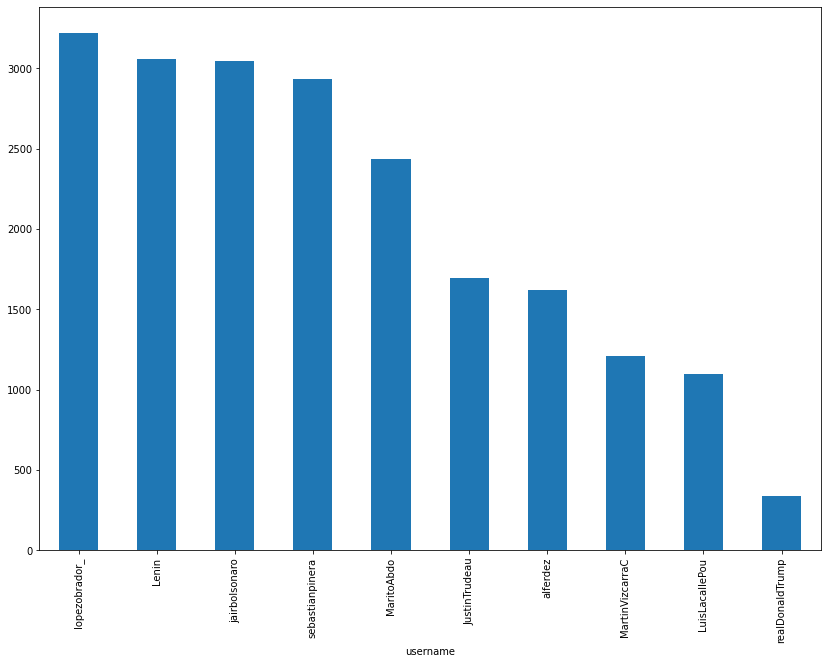

In [56]:
# plotando 
quantidade_por_usuario.plot(kind = 'bar', figsize=(14,10))

In [57]:
# quantificando tweets com mais retweets
df.sort_values('retweet_count', ascending = False).head()

created_at  ...                                            text_en
17187  2020-10-14 01:50:27+00:00  ...                            https://t.co/wJN4zv0y8O
17392  2020-10-07 21:49:39+00:00  ...  A MESSAGE FROM THE PRESIDENT! https://t.co/uhL...
17321  2020-10-08 02:57:08+00:00  ...                                Mike Pence WON BIG!
17319  2020-10-18 13:50:54+00:00  ...  Hunter Biden’s laptop is a disaster for the en...
17393  2020-10-09 18:44:41+00:00  ...  Breaking News: 50,000 OHIO VOTERS getting WRON...

[5 rows x 7 columns]

In [58]:
# quantificando tweets com mais likes
df.sort_values('favorite_count', ascending = False).head()

created_at  ...                                            text_en
17321  2020-10-08 02:57:08+00:00  ...                                Mike Pence WON BIG!
17187  2020-10-14 01:50:27+00:00  ...                            https://t.co/wJN4zv0y8O
17219  2020-10-12 12:38:44+00:00  ...           California is going to hell. Vote Trump!
17323  2020-10-08 01:55:13+00:00  ...  Mike Pence is doing GREAT! She is a gaffe mach...
17258  2020-10-17 16:01:47+00:00  ...                             GIANT RED WAVE COMING!

[5 rows x 7 columns]

In [60]:
# Agrupando textos por usuário
text_por_usario = df.groupby('username').text_en.agg(list)
text_por_usuario

username
JustinTrudeau      [We're working around the clock to protect you...
Lenin              [I spoke with @ Almagro_OEA2015 and I have cle...
LuisLacallePou     [Today we meet in Artigas to talk about our go...
MaritoAbdo         [This was our journey in # AltoParaná and # Ca...
MartinVizcarraC    [Great initiative that strengthens our nationa...
alferdez           [Brian Gallo was the victim of discrimination ...
jairbolsonaro      [@filgmartin 🤝🇧🇷, You can understand why some ...
lopezobrador_      [I am happy with the response of the people of...
realDonaldTrump    [See you in FLORIDA tomorrow night. Big Rally!...
sebastianpinera    [The MR, Araucanía, Ñuble and Biobío are the r...
Name: text_en, dtype: object

In [65]:
# fazendo download de stopwords em ingles
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

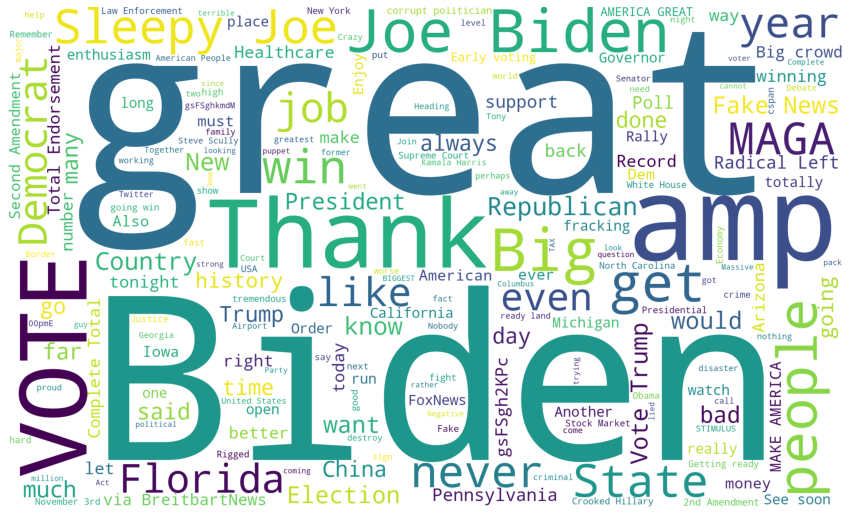

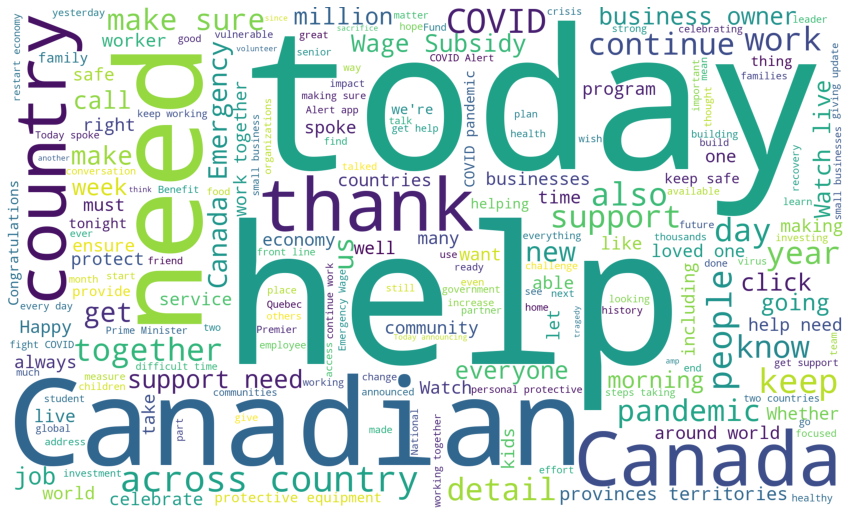

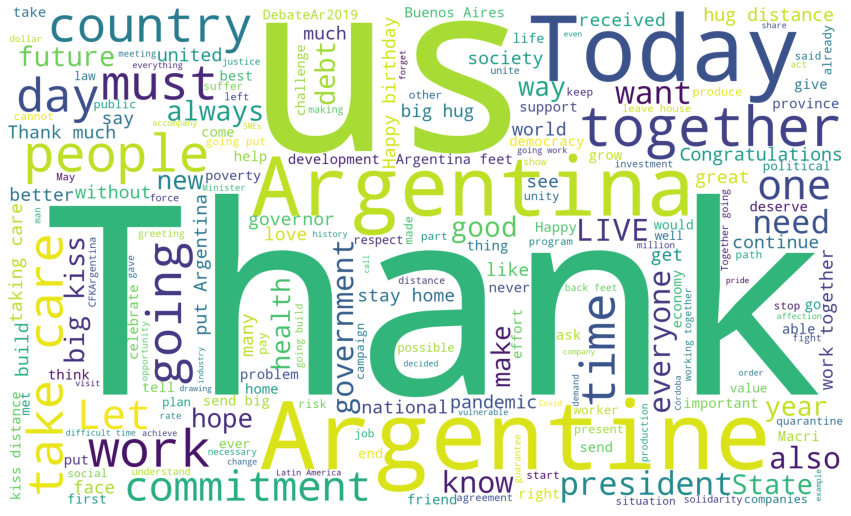

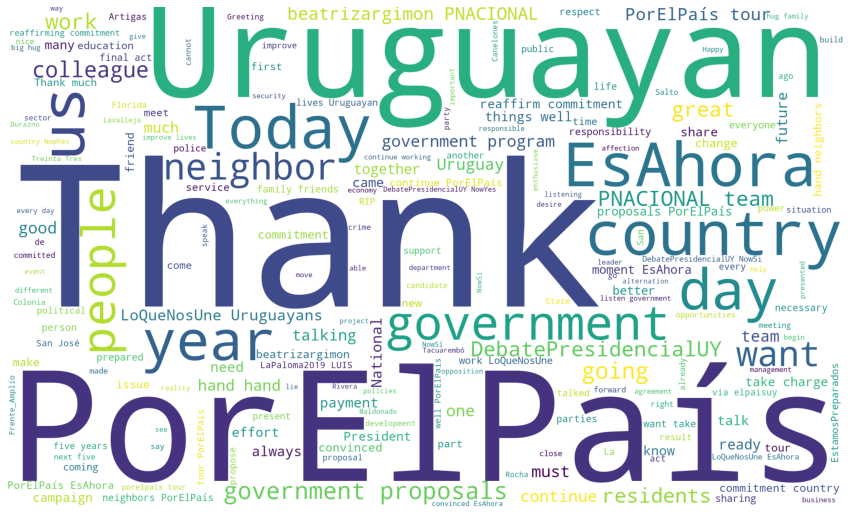

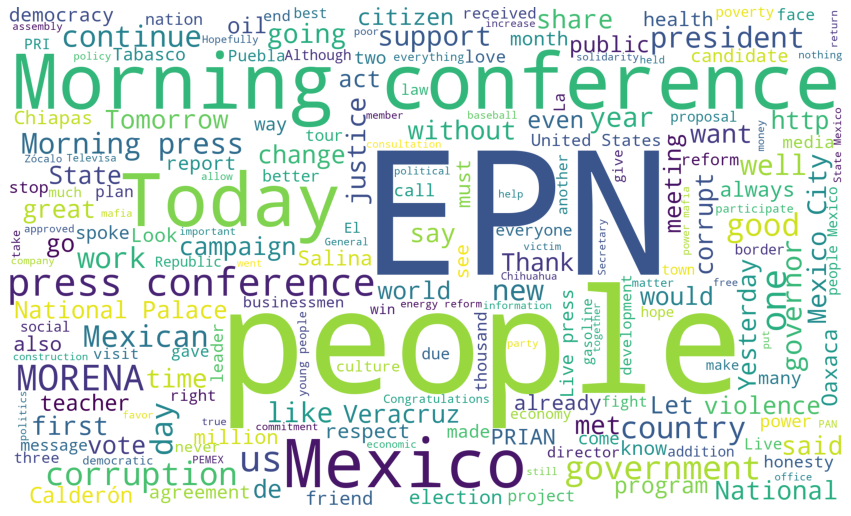

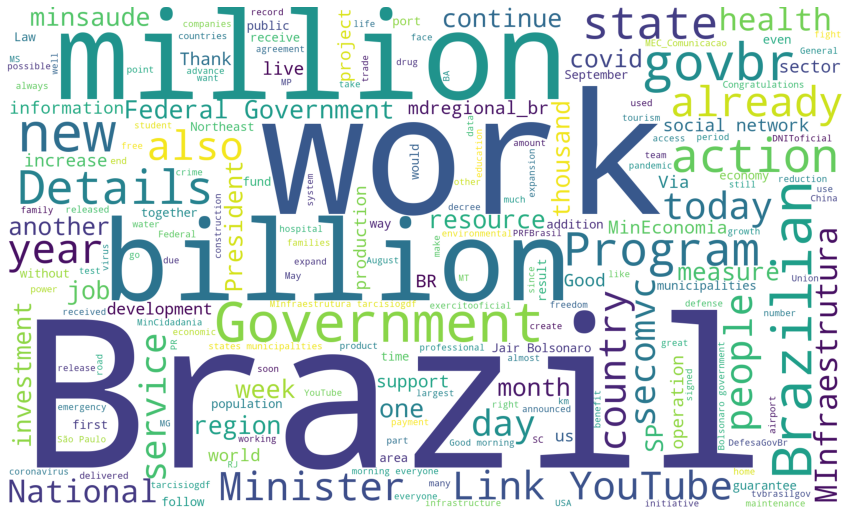

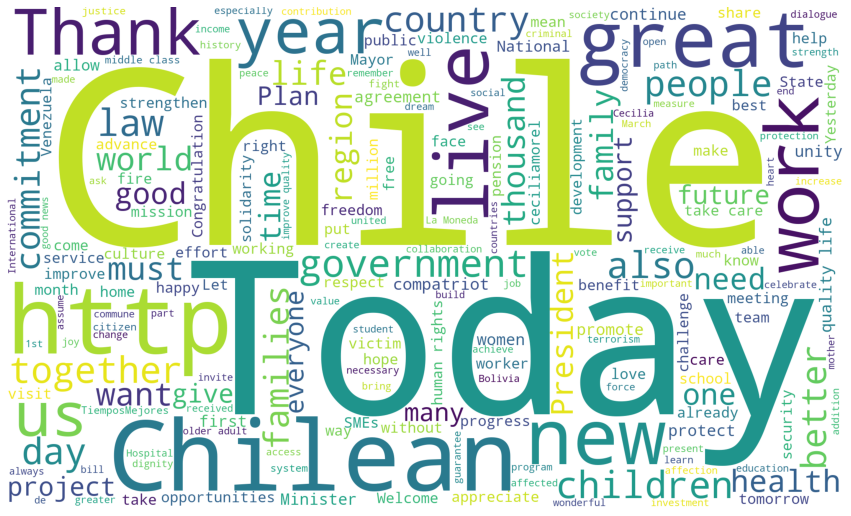

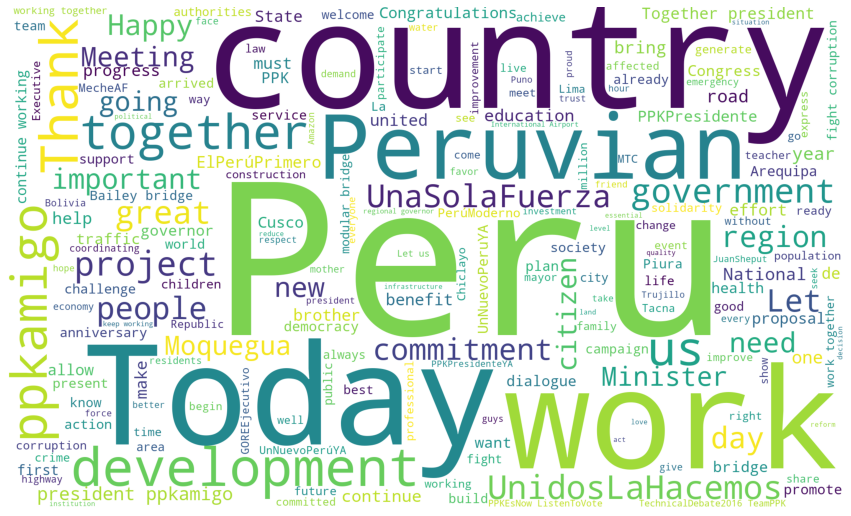

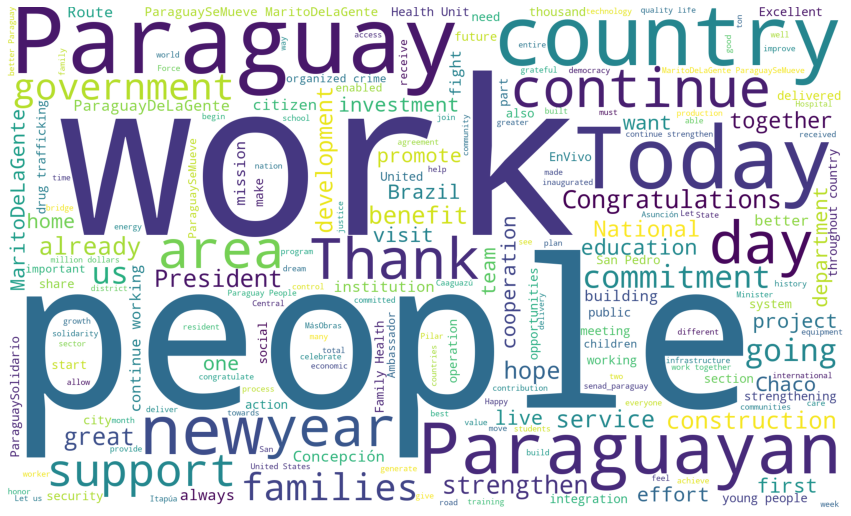

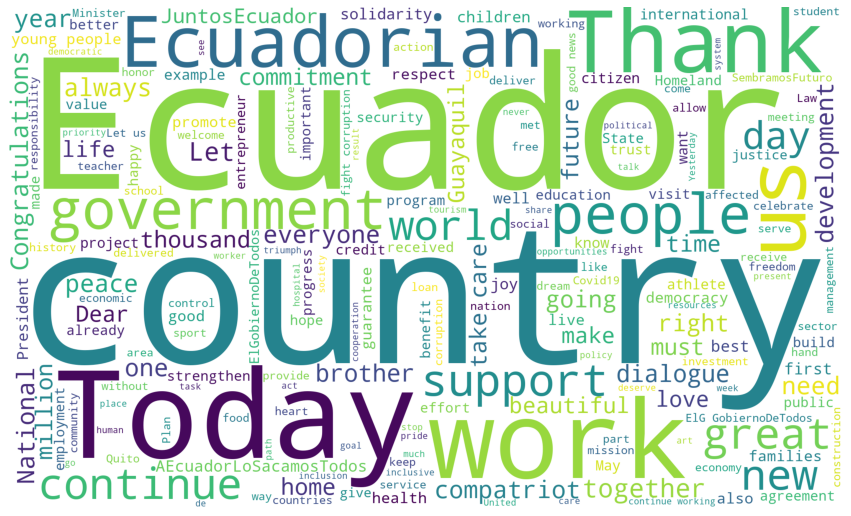

In [83]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
 
for i in range(len(usuarios)):
  # recolhendo o texto por usuario
  texts = text_por_usuario[usuarios[i]]
  
  # setando stopwords para o idioma ingles
  stop_words = set(stopwords.words('english')) #['https',  'co'] # O que muda ?
  stop_words.add('https')
  stop_words.add('co')
  stop_words.add('http')
  
  # criando objeto nuvem de palavras
  wordcloud = WordCloud(stopwords = stop_words,
                        background_color = "white",
                        width = 2000, height = 1200).generate(" ".join(texts))

  # criando objeto grafico
  fig, ax = plt.subplots(figsize = (15,10))
  ax.imshow(wordcloud, interpolation = 'bilinear')
  ax.set_axis_off()

  plt.savefig(f'presidente_{usuarios[i]}.png')
  plt.imshow(wordcloud);